In [230]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np

%matplotlib inline


In [231]:
data = pd.read_csv("C:/Data/datset_ex1.csv")

In [232]:
data.shape

(749, 9)

In [233]:
data.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,122,90,51,220,49.7,0.325,31,1
1,1,163,72,0,0,39.0,1.222,33,1
2,1,151,60,0,0,26.1,0.179,22,0
3,0,125,96,0,0,22.5,0.262,21,0
4,1,81,72,18,40,26.6,0.283,24,0
5,2,85,65,0,0,39.6,0.930,27,0
6,1,126,56,29,152,28.7,0.801,21,0
7,1,96,122,0,0,22.4,0.207,27,0
8,4,144,58,28,140,29.5,0.287,37,0
9,3,83,58,31,18,34.3,0.336,25,0


SPRAWDZAMY CZY SĄ PUSTE KOLUMNY

In [234]:
data.isnull().values.any()

False

CZYŚCIMY DATASET Z NIENATURALNYCH WYNIKÓW

In [235]:
print("Number of rows in total: {0}".format(len(data)))
print("Number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin']==0])))
print("Number of rows missing BMI: {0}".format(len(data.loc[data['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}".format(len(data.loc[data['Age']==0])))



Number of rows in total: 749
Number of rows missing Glucose: 5
Number of rows missing BloodPressure: 34
Number of rows missing SkinThickness: 223
Number of rows missing Insulin: 365
Number of rows missing BMI: 10
Number of rows missing DiabetesPedigreeFunction: 0
Number of rows missing Age: 0


ZAMIENIAMY ZERA NA MEDIANĘ

In [236]:
data.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,122,90,51,220,49.7,0.325,31,1
1,1,163,72,0,0,39.0,1.222,33,1
2,1,151,60,0,0,26.1,0.179,22,0
3,0,125,96,0,0,22.5,0.262,21,0
4,1,81,72,18,40,26.6,0.283,24,0


In [237]:

data['Glucose']=data.Glucose.mask(data.Glucose == 0, data['Glucose'].mean(skipna=True))
data['BloodPressure']=data.BloodPressure.mask(data.BloodPressure == 0, data['BloodPressure'].mean(skipna=True))
data['SkinThickness']=data.SkinThickness.mask(data.SkinThickness == 0, data['SkinThickness'].mean(skipna=True))
data['Insulin']=data.Insulin.mask(data.Insulin == 0, data['Insulin'].mean(skipna=True))
data['BMI']=data.BMI.mask(data.BMI == 0, data['BMI'].mean(skipna=True))
data['DiabetesPedigreeFunction']=data.DiabetesPedigreeFunction.mask(data.DiabetesPedigreeFunction == 0, data['DiabetesPedigreeFunction'].mean(skipna=True))


data.head(5)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1,122.0,90.0,51.000000,220.000000,49.7,0.325,31,1
1,1,163.0,72.0,20.520694,80.444593,39.0,1.222,33,1
2,1,151.0,60.0,20.520694,80.444593,26.1,0.179,22,0
3,0,125.0,96.0,20.520694,80.444593,22.5,0.262,21,0
4,1,81.0,72.0,18.000000,40.000000,26.6,0.283,24,0


In [238]:
#sprawdzamy czy zadziałało
print("Number of rows in total: {0}".format(len(data)))
print("Number of rows missing Glucose: {0}".format(len(data.loc[data['Glucose']==0])))
print("Number of rows missing BloodPressure: {0}".format(len(data.loc[data['BloodPressure']==0])))
print("Number of rows missing SkinThickness: {0}".format(len(data.loc[data['SkinThickness']==0])))
print("Number of rows missing Insulin: {0}".format(len(data.loc[data['Insulin']==0])))
print("Number of rows missing BMI: {0}".format(len(data.loc[data['BMI']==0])))
print("Number of rows missing DiabetesPedigreeFunction: {0}".format(len(data.loc[data['DiabetesPedigreeFunction']==0])))
print("Number of rows missing Age: {0}".format(len(data.loc[data['Age']==0])))



Number of rows in total: 749
Number of rows missing Glucose: 0
Number of rows missing BloodPressure: 0
Number of rows missing SkinThickness: 0
Number of rows missing Insulin: 0
Number of rows missing BMI: 0
Number of rows missing DiabetesPedigreeFunction: 0
Number of rows missing Age: 0


SPRAWDZAMY ILE JEST OSÓB Z CUKRZYCĄ, A ILE JEJ NIE MA

In [241]:
diabetes_positive_count = len(data.loc[data['Outcome'] == 1])
diabetes_negative_count = len(data.loc[data['Outcome'] == 0])

print(diabetes_positive_count, diabetes_negative_count)

265 484


TRAIN-TEST SPLIT

In [242]:
from sklearn.model_selection import train_test_split

feature_columns = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
predicted_class = ['Outcome']

x = data[feature_columns].values
y = data[predicted_class].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10)

ALGORYTM (RandomForest_Classification)

In [243]:
from sklearn.ensemble import RandomForestClassifier

random_forest_model = RandomForestClassifier(random_state=10)

random_forest_model.fit(x_train, y_train.ravel())

RandomForestClassifier()


In [244]:
predict_train_data = random_forest_model.predict(x_test)

from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, predict_train_data)))

Accuracy = 0.764


OPTYMALIZACJA

In [245]:
from sklearn.model_selection import GridSearchCV

In [246]:
forest = RandomForestClassifier(random_state = 1, n_estimators = 10, min_samples_split = 1)

In [247]:
forest = RandomForestClassifier(random_state = 1)
modelF = forest.fit(x_train, y_train.ravel())
y_predF = modelF.predict(x_test)

In [248]:
n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train.ravel())

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [249]:
gridF.best_params_

{'max_depth': 15,
 'min_samples_leaf': 2,
 'min_samples_split': 15,
 'n_estimators': 100}

In [250]:
forestOpt = RandomForestClassifier(random_state = 1, max_depth = 15, n_estimators = 100, min_samples_split = 15, min_samples_leaf = 2)
                                   
forestOpt.fit(x_train, y_train.ravel())

RandomForestClassifier(max_depth=15, min_samples_leaf=2, min_samples_split=15,
                       random_state=1)

In [224]:
from sklearn import metrics

print("Accuracy = {0:.3f}".format(metrics.accuracy_score(y_test, modelOpt.predict(x_test))))

Accuracy = 0.787


WIZUALIZACJA

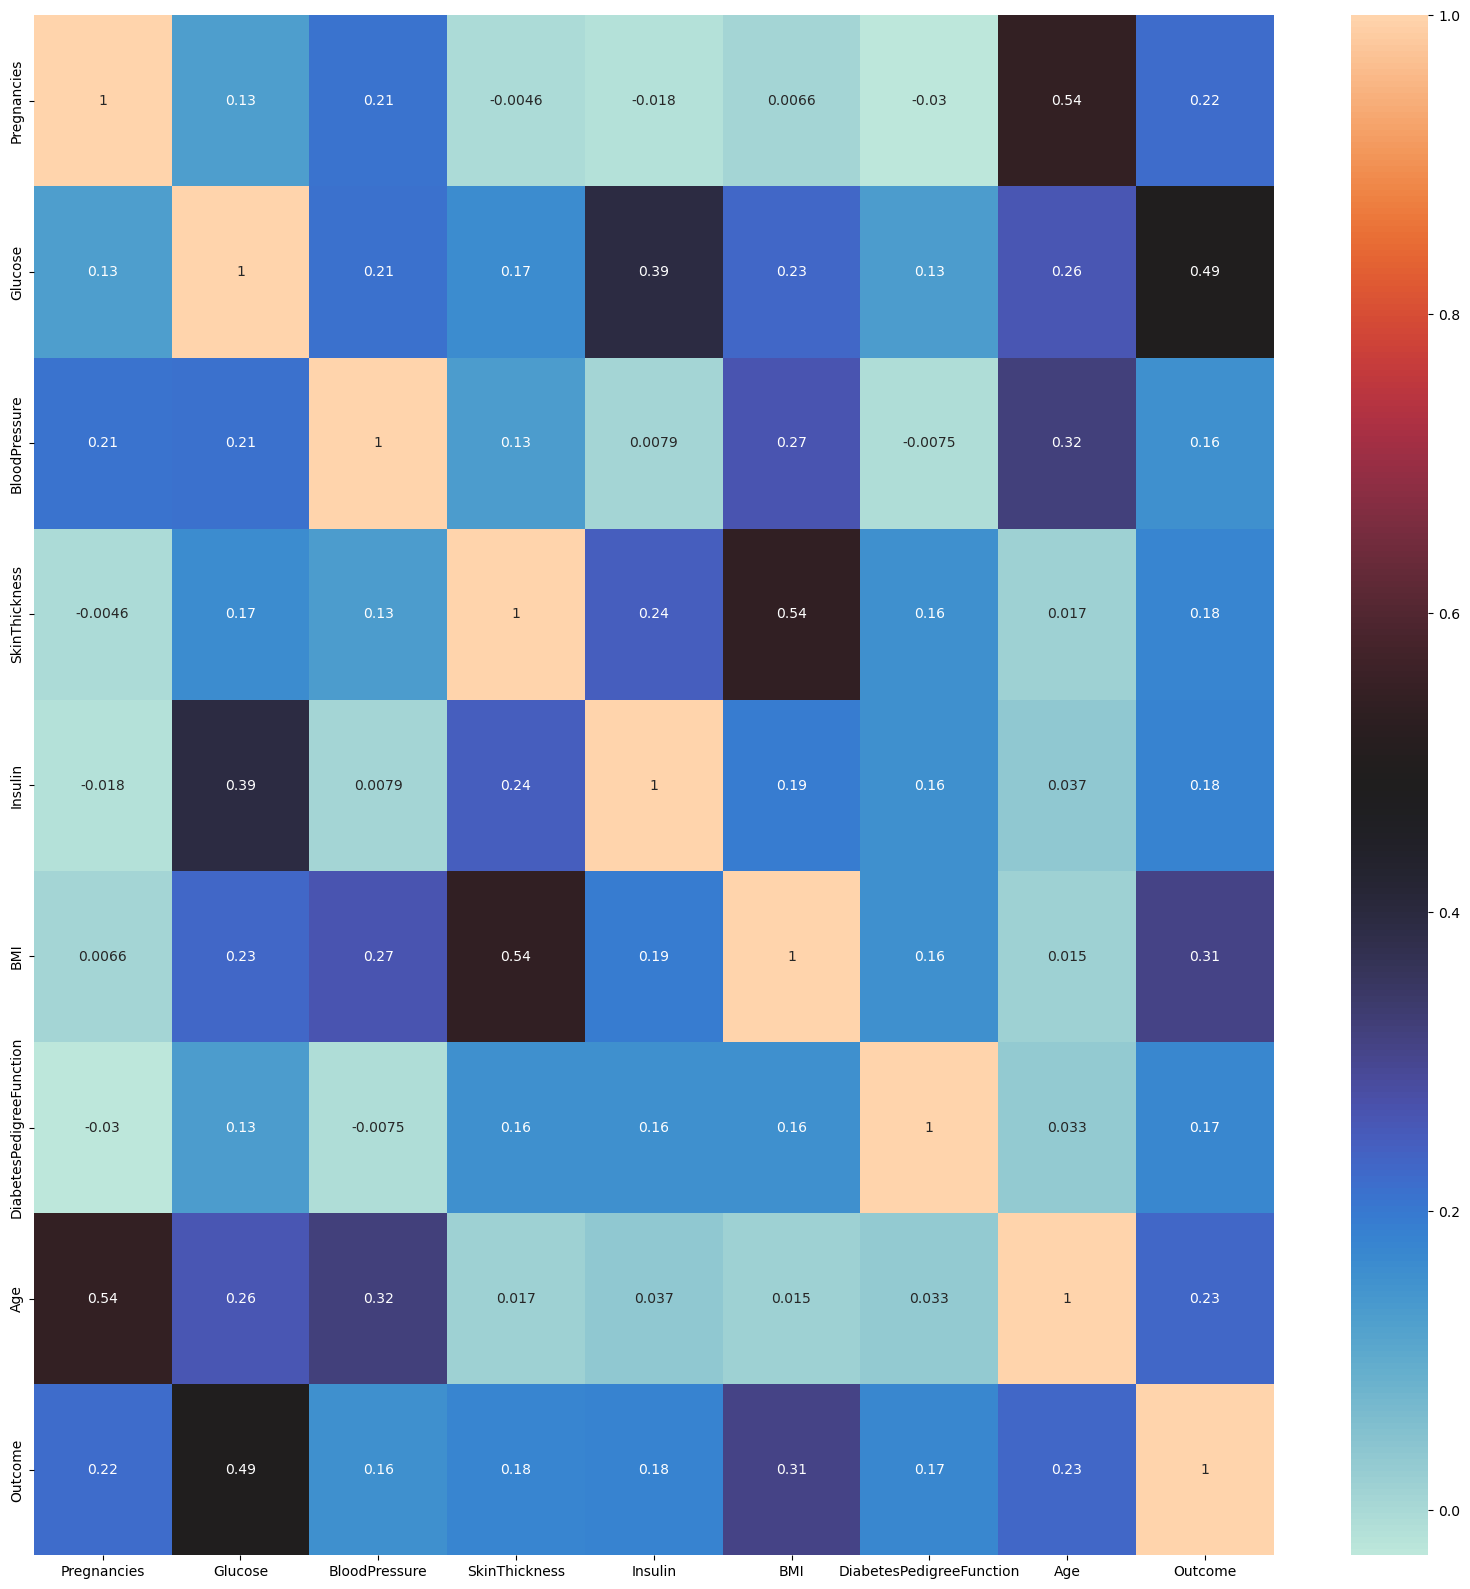

In [258]:
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="icefire")

Nie ma silnych zależności, ale największa korelacja jest pomiędzy:

    - Age x Pregnancies (0.54) - starsze kobiety mają tendencję do większej liczby ciąż

    - SkinThickness x BMI (0.54)

    - Glucose x insulin (0.39) - wyższy poziom glukozy zazwyczaj oznacza większy poziom insuliny we krwi
    
    - Glucose x Outcome (0.49) - wysoki poziom glukozy często oznacza zwiększoną szansę na zachorowanie

    


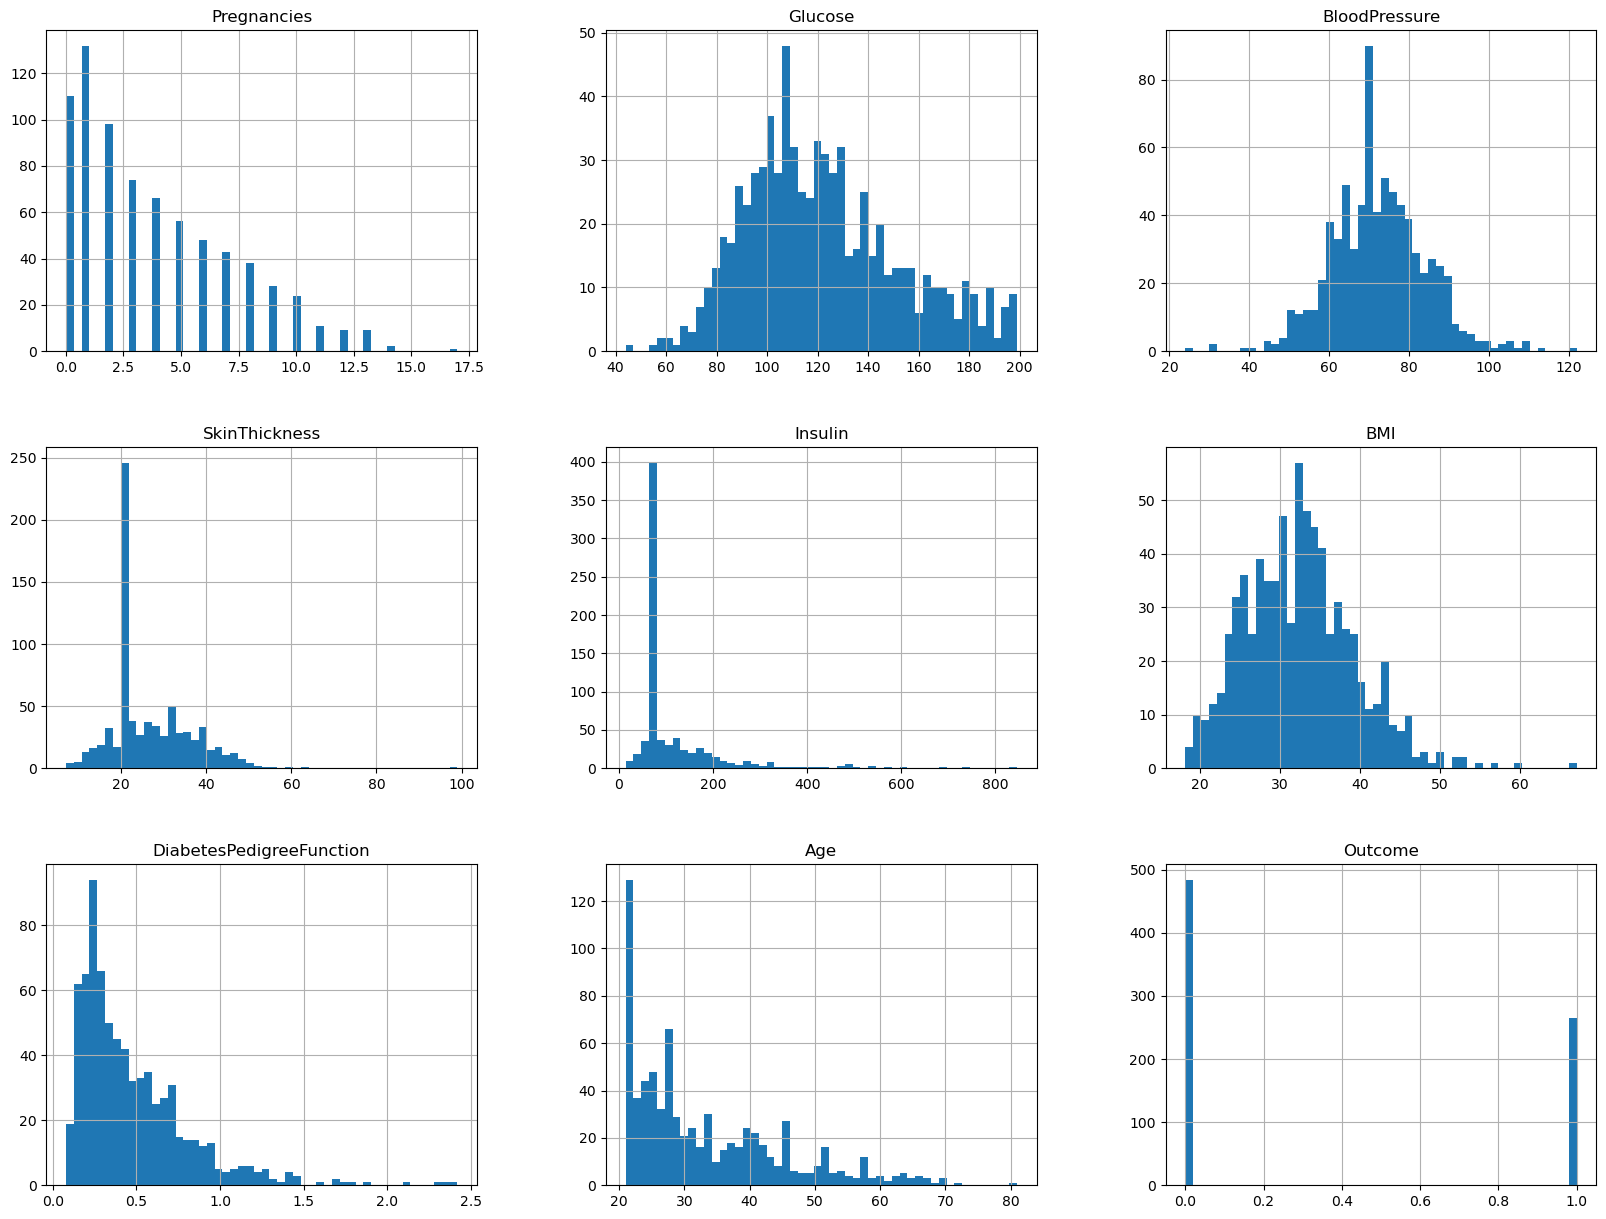

In [252]:
data.hist(bins=50, figsize=(20, 15))
plt.show()

In [254]:
data.groupby('Outcome').mean()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.285124,111.020176,70.953530,25.358130,107.220685,30.911535,0.432787,31.289256
1,4.830189,142.235887,74.860826,28.953886,142.341376,35.368380,0.554253,36.958491


Kobiety, które mają cukrzycę były w większej ilości ciąż, mają większe ciśnienie, grubszą skórę, znacznie wyższy poziom insuliny, większe BMI i są z reguły starsze od zdrowych.